# Heart Disease Detection System

Heart disease is one of the most common forms of disease in the current world. There are many parameters which work in determining whether anyone is suffering from heart disease or not. Based on a dataset of patients with a probable heart disease, we have developed a system based on a machine learning algorithm to determine whether or not a person has cardiac issues.

## 1. Importing libraries

First we need to import the necessary libraries in order to get our system up and running. They include Pandas, NumPy & Matplotlib libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Now, we select what sort of algorithms we choose to run our system. We've decided to utilise 3 different algorithms and then compare the results each of them produce, from which we can decide which algorithm is the best for our system.

The 3 algorithms are -
#### 1. K Neighbours Classifier
#### 2. Decision Tree Classifier &
#### 3. Random Forest Classifier.

Now, we import all these algorithms from the Sklearn library.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Reading the dataset

Now, we use Pandas to open the dataset and read the data. We can the basic info of the dataset.

In [3]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset is free of any null values. Everything looks good so far.

Now, we can check for some of the basic stats of this dataset, for example - count, mean, std etc. using the describe function from Pandas.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 3. Creating graphs for analysis

Now that we have a working dataset, we can further analyze the data by creating graphs from Seaborn. For this, we import the Seaborn library.

First, we'll see a distribution of the different features in our dataset using histograms.

<Figure size 576x576 with 0 Axes>

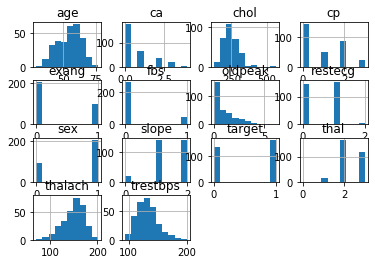

In [5]:
plt.figure(figsize=(8,8))
df.hist()
plt.show()

Another thing to make certain about a dataset is to make the number of target values equal to each other to get a balanced output to the prediction system. We can check our target's value count with the bar graph.

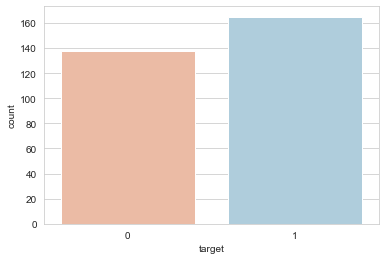

In [6]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu')

From the graph, we can see that the number of patients without a heart disease is slightly lower than people with a heart condition. We can say that the target of the dataset is quite balanced.

## 4. Data Processing

Now, we'll look to create a correlation heatmap which will tell us which features are the most correlated to predicting a potential heart disease. We can be certain that those features will be important in deciding the probability of a heart disease.

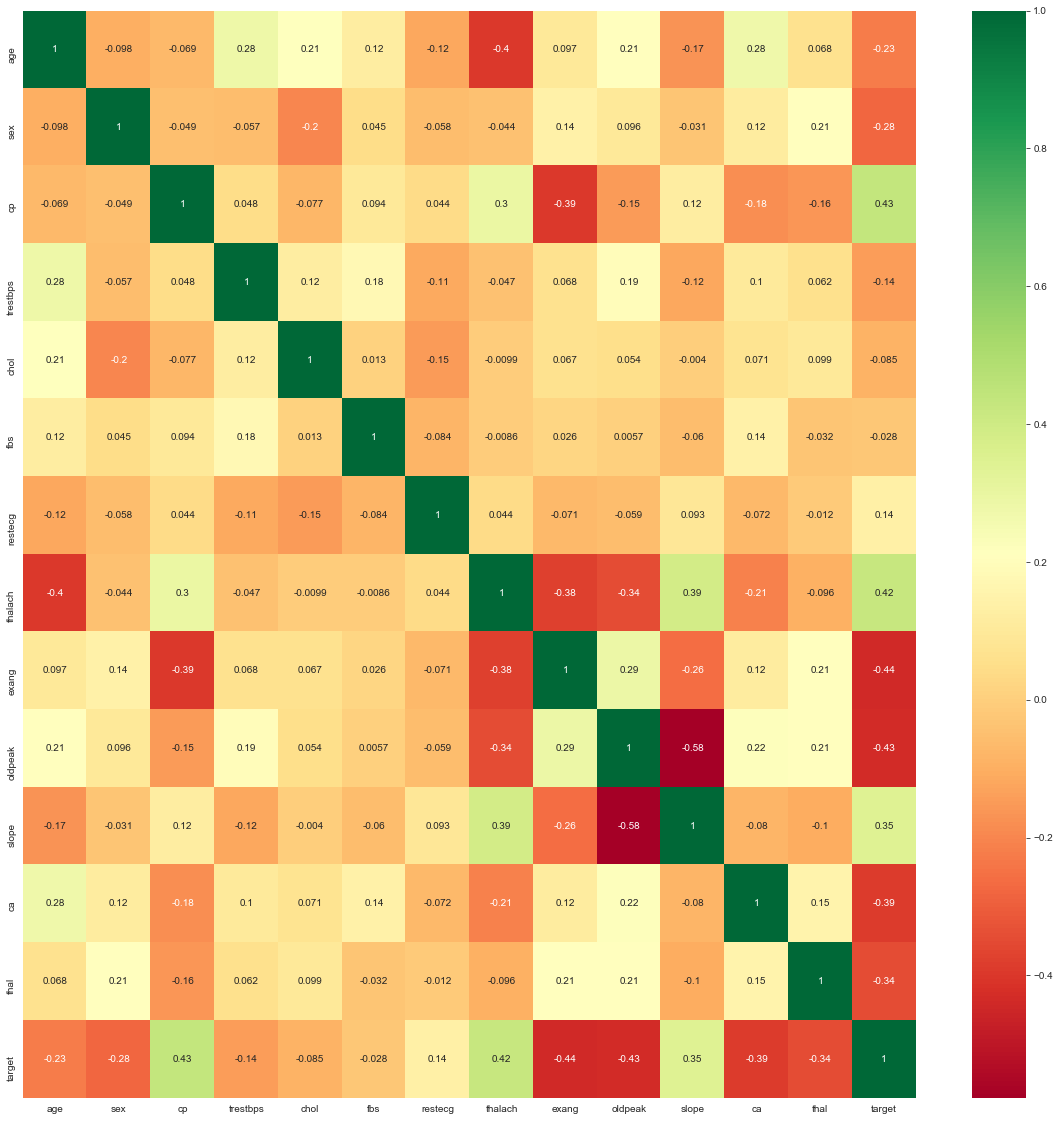

In [7]:
corr = df.corr()
corrfeat = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[corrfeat].corr(), annot=True, cmap='RdYlGn')

After exploring the dataset, we've noticed that some categories need to be converted to dummy variables and then scaled before using them in machine learning models. We can use the get_dummies method to convert it to dummy variables.

In [8]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Also, there are also particular categorical variables which need to be scaled in the standard format since they are in completely different units.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[to_scale] = StandardScaler.fit_transform(dataset[to_scale])

Now, let's take a look at the newly formatted dataset.

In [10]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# 5. Splitting the dataset and model selection

First, let's split the dataset into input and output for the usage in the machine learning models.

In [11]:
y = dataset['target']
X = dataset.drop(['target'], axis=1)

Now, let's work with the K-Neighbors Classifier model. For this particular model, we need to find an average number of nearest neighbors to run the model around. We can do that with the cross validation method from the sklearn library.

In [12]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
    knnclassifier = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knnclassifier, X, y, cv=10)
    knn_scores.append(score.mean())

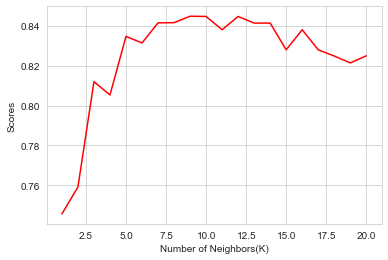

In [13]:
plt.plot([k for k in range(1,21)], knn_scores, color='red')
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')
plt.show()

Now, let's run the K-Neighbors model with the average neighbor value of 12.

In [14]:
knnclassifier = KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knnclassifier, X, y, cv=10)
score.mean()

0.8448387096774195

Lastly, let's run the Random Forest Classifier and the Decision Tree Classifier models and check their accuracy scores with the previous model.

In [15]:
randomforest = RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest, X, y, cv=10)
score.mean()

0.8017204301075269

In [16]:
decisiontree = DecisionTreeClassifier(max_depth=10)
score=cross_val_score(decisiontree, X, y, cv=10)
score.mean()

0.7516129032258064

From the above comparisons, the K-Neighbor machine learning model seems to be the best approach to determining this particular problem.